<a href="https://colab.research.google.com/github/Orest-tronic/FAST_AI/blob/master/Mon_test_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
from PIL import Image

# PARTIE TEST DE L'ENVIRONNEMENT

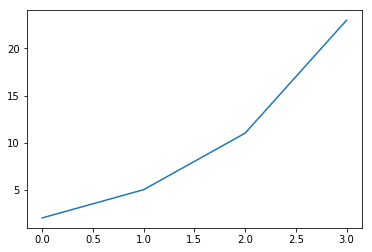

In [5]:
plt.plot([a, b, c, d])
plt.show()

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [8]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

#Debut de la partie CODAGE de l'IA

Nous créons l'objet path qui sera le chein vers lequel notre dataset sera enregistrer, dataset provenant de ***URLs.PETS***

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:7]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_189.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_101.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_202.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_198.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_16.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_96.jpg')]

Nous allons extraire les titres de nos images grace à la définition de l'objet ***pat***.

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,Birman,samoyed,Egyptian_Mau,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_cocker_spaniel,British_Shorthair,boxer,Birman,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

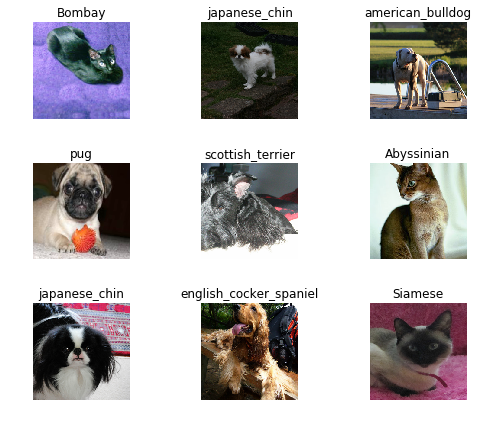

In [10]:
data.show_batch(rows=3, figsize=(7, 6))

In [11]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 106MB/s]


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.385948,0.330967,0.108931,01:45
1,0.622734,0.271742,0.084574,01:45
2,0.382069,0.231539,0.073072,01:46
3,0.278279,0.218896,0.066982,01:46


In [14]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.245540,0.230142,0.068336,01:45
1,0.293586,0.314779,0.101489,01:46
2,0.327450,0.267684,0.088633,01:47
3,0.292461,0.242820,0.077808,01:46
4,0.245775,0.241574,0.079838,01:46
5,0.198828,0.216705,0.071719,01:44
6,0.158159,0.219306,0.069012,01:45
7,0.142610,0.211146,0.064276,01:45


In [0]:
learn.save('stage-1')

In [18]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,Birman,samoyed,Egyptian_Mau,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_cocker_spaniel,British_Shorthair,boxer,Birman,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


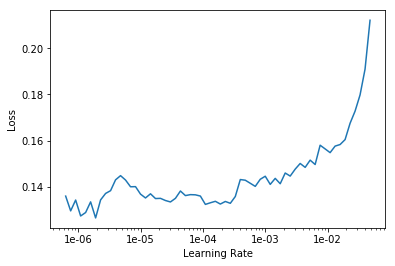

In [20]:
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4) )

epoch,train_loss,valid_loss,error_rate,time
0,0.140634,0.200356,0.067659,01:52
1,0.140947,0.204964,0.066306,01:49
